In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

In [2]:
#subs = generate_submissions(users=4, pbls=4)
subs = import_submissions(course_id = "C00198", dbname="test1")

In [3]:
mat = bianary_mat(subs)
#mat

In [4]:
Difficulties = pd.Series([1.0 for i in range(len(mat.index))], index=mat.index, name='0')
normalize(Difficulties)

Abilities = pd.Series([1.0 for i in range(len(mat.columns))], index=mat.columns, name='0')
normalize(Abilities)

In [5]:
dfAbl = pd.DataFrame(Abilities)
dfDiff = pd.DataFrame(Difficulties)

In [6]:
cnt = 10
for i in range(1,1+cnt):
    Difficulties = process_bianary_mat(mat, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
    Abilities = process_bianary_mat(mat, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
    dfAbl[Abilities.name] = Abilities
    dfDiff[Difficulties.name] = Difficulties

In [7]:
#dfAbl

In [8]:
def cmpVect(v1, v2):
    #m1 = magnitude(v1)
    #m2 = magnitude(v2)
    #mx = float(m1+m2)/2
    D = (v1 - v2) #/ mx
    return(magnitude(D.apply(abs)))

In [9]:
err = pd.Series([cmpVect(dfAbl["%d"%i], dfAbl["%d"%(i+1)]) for i in range(len(dfAbl.columns)-1)])

<IPython.core.display.Javascript object>


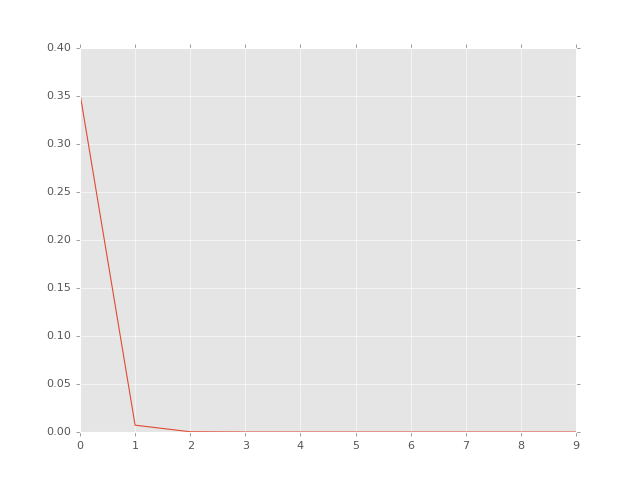

In [10]:
err.plot()

In [11]:
err2 = pd.Series([cmpVect(dfDiff["%d"%i], dfDiff["%d"%(i+1)]) for i in range(len(dfDiff.columns)-1)])

<IPython.core.display.Javascript object>


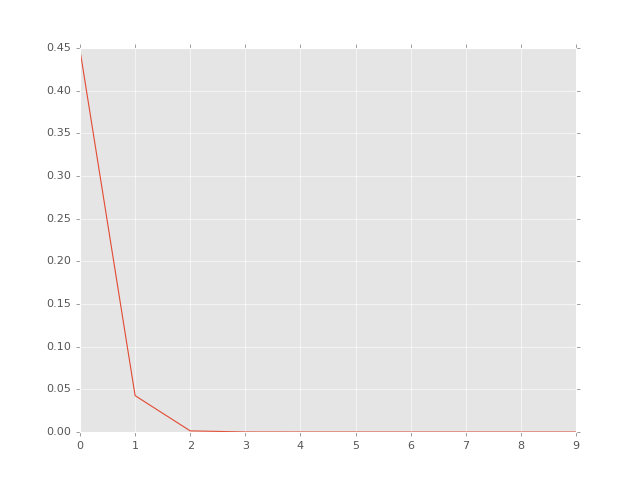

In [12]:
err2.plot()